# Question 2

Write a program to implement down sampling of an image by a factor of `2`. Apply the same effect for 2 / 3 successive times and comment on visual content. Finally, write a program to upscale the down sampled image through interpolation and comment on visual quality of the image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'f256',
    'l256',
    'o256',
    'p256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



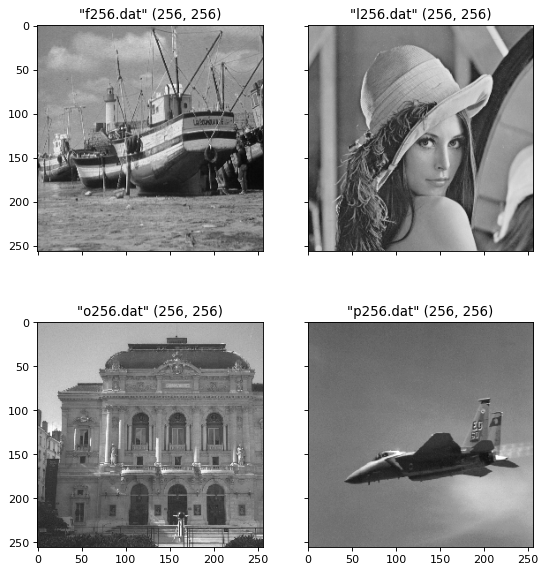

In [4]:
# Matrix dimensions
cols = 2
rows = -(-len(filenames) // cols)

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Downsampling

Implement down sampling by a factor of `2`.

Apply the same effect for 2 / 3 successive times and comment on visual content. 

In [5]:
def downsample(image, multiplier):
    '''
    Downsamples an image.

    Averages pixel values in blocks of size = multiplier

    Parameters:
        image (array-like): Input image
        multiplier(int): Block size

    Returns:
        int: Downsampled image
    '''

    down_img = np.copy(image)
    height, width = down_img.shape

    for i in range(height)[::multiplier]:
        for j in range(width)[::multiplier]:
            step = multiplier // 2

            sum = 0
            for r in range(i, i + multiplier):
                for c in range(j, j + multiplier):
                    sum = sum + int(down_img[r][c])
            avg_pix = sum // (multiplier ** 2)
            # avg_pix = (
            #     int(down_img[i][j]) +
            #     int(down_img[i][j + step]) +
            #     int(down_img[i + step][j]) +
            #     int(down_img[i + step][j + step])
            # ) // 4

            for r in range(i, i + multiplier):
                for c in range(j, j + multiplier):
                    down_img[r][c] = avg_pix
    
    return down_img

In [6]:
def plot_downsampled(key, multiplier):
    '''
    Downsamples all images and plots them.

    Parameters:
        key (str): Key in image dict to access required input images
        multiplier (int): Block size
    
    Returns:
        None
    '''

    cols = 2
    rows = -(-len(filenames) // cols)

    # Create figure with rows × cols subplots
    fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
    fig.set_size_inches(4 * cols, 4.5 * rows)
    fig.suptitle('Downsampled: {} time ({}x)'.format(
        int(math.log(multiplier, 2)), multiplier),
        fontsize=18
    )

    # Iterate for all images
    for idx, image_dict in enumerate(images):
        filename = image_dict['filename']
        down_img = downsample(image_dict[key], multiplier)

        # Add dictionary of filename, min pixel, max pixel, threshold image into list
        images[idx]['down_{}x'.format(multiplier)] = down_img

        # Set subplot title
        axs[idx // cols, idx % cols].set_title('"{}"'.format(filename))
        # Add subplot to figure plot buffer
        axs[idx // cols, idx % cols].imshow(down_img, cmap='gray', vmin=0, vmax=255)

        # Save threshold image as .bmp file
        plt.imsave(
            path_out_conv + ext_out[1:] + '/' + filename + '_down_{}x'.format(multiplier) + ext_out,
            down_img,
            cmap='gray',
            vmin=0,
            vmax=255
        )

        # Save pixel values of threshold image as a 2D matrix in a .dat file
        np.savetxt(
            path_out_conv + ext_inp[1:] + '/' + filename + '_down_{}x'.format(multiplier) + ext_inp,
            down_img,
            fmt=' %d',
            newline=' \n'
        )

    # Hide x labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()

    # Save and display the figure
    plt.savefig('downsampled_{}x.jpg'.format(multiplier))
    plt.show()

### 1st time (2x)

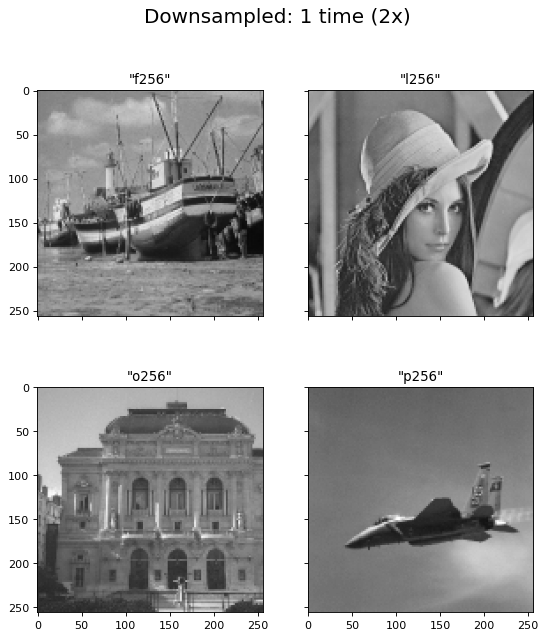

In [7]:
plot_downsampled('orig', 2)

### 2nd time (4x)

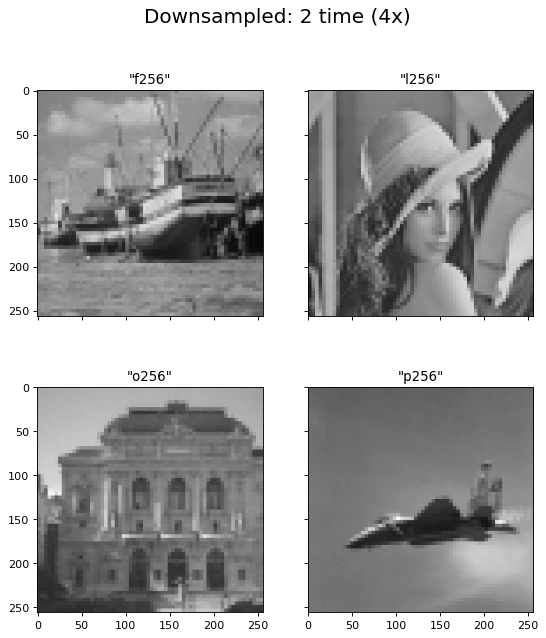

In [8]:
plot_downsampled('down_2x', 4)

### 3rd time (8x)

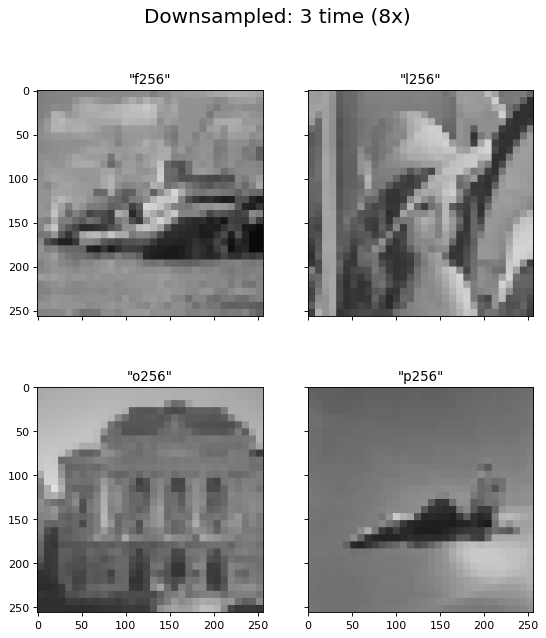

In [9]:
plot_downsampled('down_4x', 8)

## Compare images

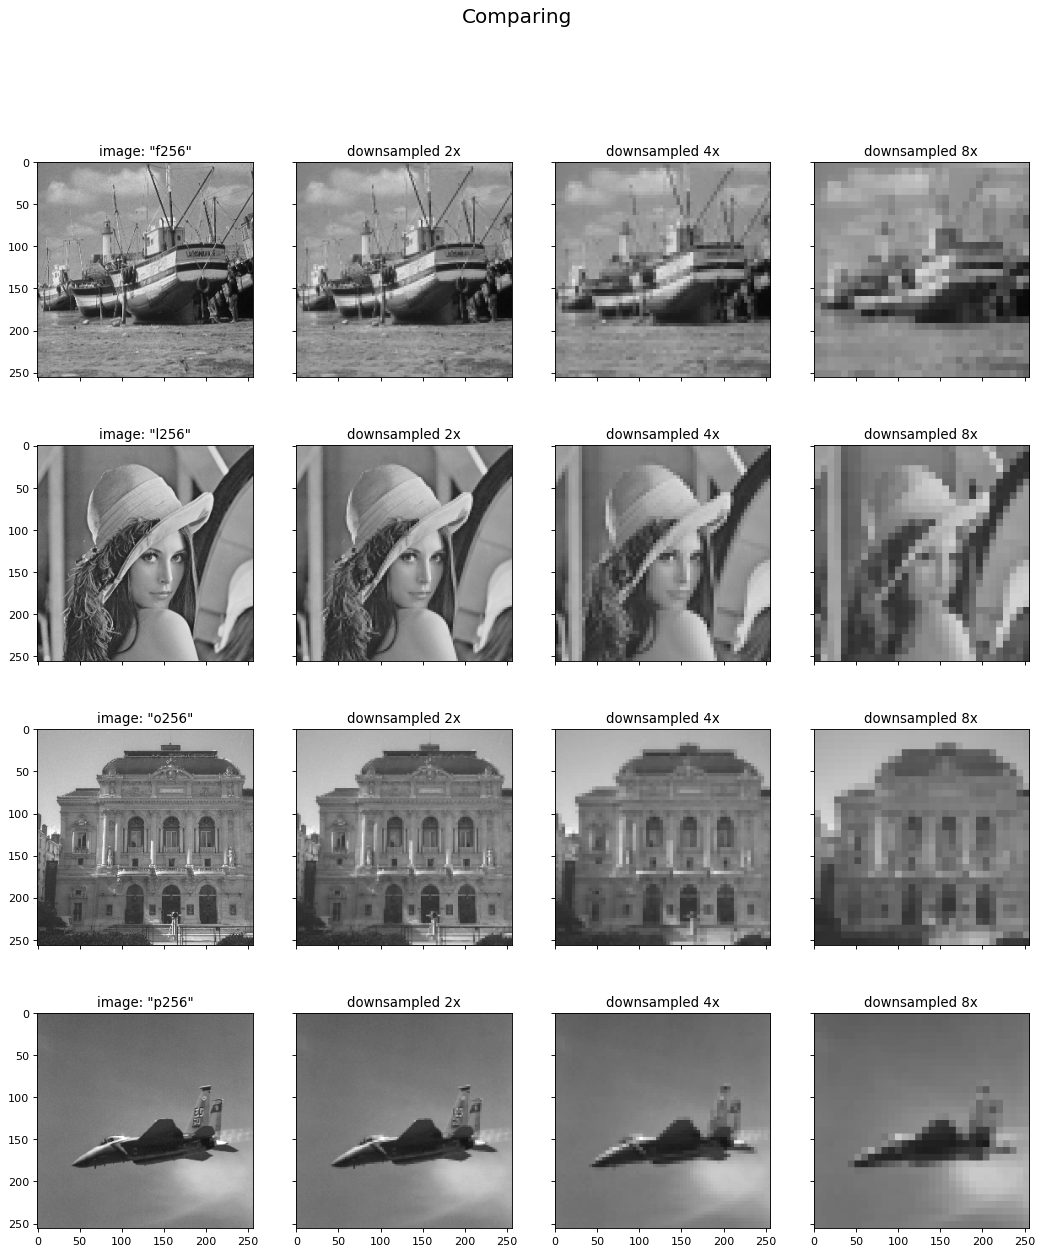

In [10]:
rows, cols = len(images), 4

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)
fig.suptitle("Comparing", fontsize=18)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    orig = image_dict['orig']
    down_2x = image_dict['down_2x']
    down_4x = image_dict['down_4x']
    down_8x = image_dict['down_8x']

    # Set subplot title
    axs[idx, 0].set_title('image: "{}"'.format(filename))
    # Add subplot to figure plot buffer
    axs[idx, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)

    # Set subplot title
    axs[idx, 1].set_title('downsampled 2x')
    # Add subplot to figure plot buffer
    axs[idx, 1].imshow(down_2x, cmap='gray', vmin=0, vmax=255)

    # Set subplot title
    axs[idx, 2].set_title('downsampled 4x')
    # Add subplot to figure plot buffer
    axs[idx, 2].imshow(down_4x, cmap='gray', vmin=0, vmax=255)

    # Set subplot title
    axs[idx, 3].set_title('downsampled 8x')
    # Add subplot to figure plot buffer
    axs[idx, 3].imshow(down_8x, cmap='gray', vmin=0, vmax=255)

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Save and display the figure
plt.savefig('downsampled_comp.jpg')
plt.show()